In [3]:
###------Network Simulator------###
###------Shulin Cao------###
###------CMRG, UC San Diego------###
### Please install the corresponding packages ###

###import packages###
import pandas as pd
import collections
import timeit
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.mlab as mlab
import statistics
import random
import numpy.linalg
import numpy as np
import sys
from scipy.optimize import minimize
elapsed_time = timeit.default_timer()
from sklearn.linear_model import LinearRegression
from sklearn import cluster
import seaborn as sns
sns.set()
from sklearn import datasets
from sklearn.metrics import r2_score
from matplotlib import pylab
from matplotlib import font_manager
import chaospy as cp 
import uncertainpy as un
from scipy.stats import ks_2samp
from scipy import stats
import scipy.ndimage as ndimage
%matplotlib inline
chf = font_manager.FontProperties(fname='arial.ttf')
chf_v4 = font_manager.FontProperties(fname='arial.ttf', size = 25)
chf_v5 = font_manager.FontProperties(fname='arial.ttf', size = 25, weight = 'black')

In [4]:
current_palette = sns.color_palette()
second_col = sns.color_palette("Set2", 8)
colorset = [second_col[i] for i in [0,1,2,3,7]]
colorset.reverse()

## Data Loading and Processing

In [6]:
inputs = pd.read_csv('Fig2/Fig2A_1.csv', header = 0)
MCMC_res = pd.read_csv('Fig2/Fig2A_2.csv', header=0)
PCE2 = pd.read_csv('Fig2/Fig2_pce.csv', header = 0)
mc_2000_1 = pd.read_csv('Fig2/Fig2_mc.csv', header = 0)
mcmc_2000 = pd.read_csv('Fig2/Fig2_mcmc.csv', header = 0)
mcmc_2000 = mcmc_2000[mcmc_2000['Accuracy']>=0.01]
values1, base1 = np.histogram(PCE2['Accuracy'], bins=40)
values2, base2 = np.histogram(mc_2000_1['Accuracy'], bins=40)
values3, base3 = np.histogram(mcmc_2000['Accuracy'], bins=40)
cumulative1 = np.cumsum(values1)/len(PCE2['Accuracy'])
cumulative2 = np.cumsum(values2)/len(mc_2000_1['Accuracy'])
cumulative3 = np.cumsum(values3)/len(mcmc_2000)
input_mc_range = sorted(list(set(inputs[inputs['Method']=='MC']['SampleSize_Order'].tolist())))
input_uniform = pd.read_csv('Fig2/Fig2D_uniform.csv', header = 0)
input_normal = pd.read_csv('Fig2/Fig2D_normal.csv', header = 0)
hill_para = pd.read_csv('Fig3/Fig3A.csv', header = 0)
ec_para = pd.read_csv('Fig3/Fig3B.csv', header = 0)
acc_weight_08 = pd.read_csv('Fig3/Fig3C_0810.csv', header = 0)
acc_weights = pd.read_csv('Fig3/Fig3C_0210.csv', header = 0)
glob = pd.read_csv('Fig3/Fig3D.csv', header = 0)
inpu_thre_more = pd.read_csv('Fig4/Fig4B.csv', header = 0)
inpu_thre_more_mesh = inpu_thre_more.pivot(index = 'Input', columns = 'Threshold', values = 'Accuracy')
inpu_thre_smooth = ndimage.gaussian_filter(inpu_thre_more_mesh, sigma=2, order=0)
acc_topology = pd.read_csv('Fig5/Fig5A_AND.csv', header = 0)
acc_or = pd.read_csv('Fig5/Fig5A_OR.csv', header = 0)
final_check = pd.read_csv('Fig5/Fig5A_switch.csv', header = 0)
thre_topo = sorted(list(set(acc_topology['threshold'].tolist())))
power_val_06_uc = pd.read_csv('Fig5/Fig5B_Both.csv', header = 0)
val_alpha = pd.read_csv('Fig5/Fig5B_DE.csv', header = 0)
val_beta = pd.read_csv('Fig5/Fig5B_NC.csv', header = 0)

# Figure 2 Panel

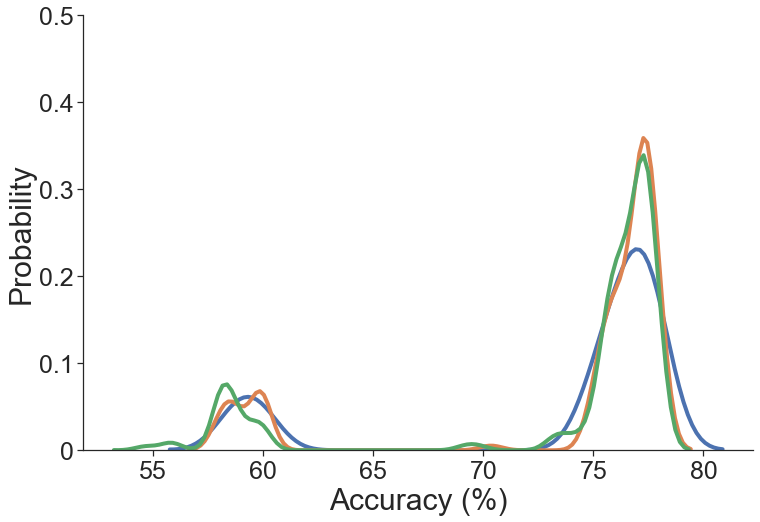

In [7]:
# Fig 2A
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 4})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
sns.distplot(inputs[(inputs['Method'] == 'PCE') & (inputs['SampleSize_Order'] == 4)]['Accuracy'].tolist(), 
             #label='PCE (order=4)',
             hist=False,
             norm_hist=True,
             bins = np.arange(0.55,0.8,0.01)
)
sns.distplot(inputs[(inputs['Method'] == 'MC') & (inputs['SampleSize_Order'] == 200)]['Accuracy'].tolist(), 
             #label='MC (samples=400)',
             hist=False,
             norm_hist=True,
             bins = np.arange(0.55,0.8,0.01)
)
sns.distplot(MCMC_res['Accuracy'].tolist(), 
             #label='MCMC (samples=400)',
             hist=False,
             norm_hist=True,
             bins = np.arange(0.55,0.8,0.01)
)
#plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.55, 0.6, 0.65, 0.7, 0.75, 0.8]), 
           ('55', '60', '65', '70', '75', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0,10,20,30,40,50]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'), 
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties=chf, fontsize=30)
plt.ylabel('Probability', fontproperties=chf, fontsize=30)
sns.despine()
#plt.savefig('Fig2A.pdf', dpi = 600)
plt.show()

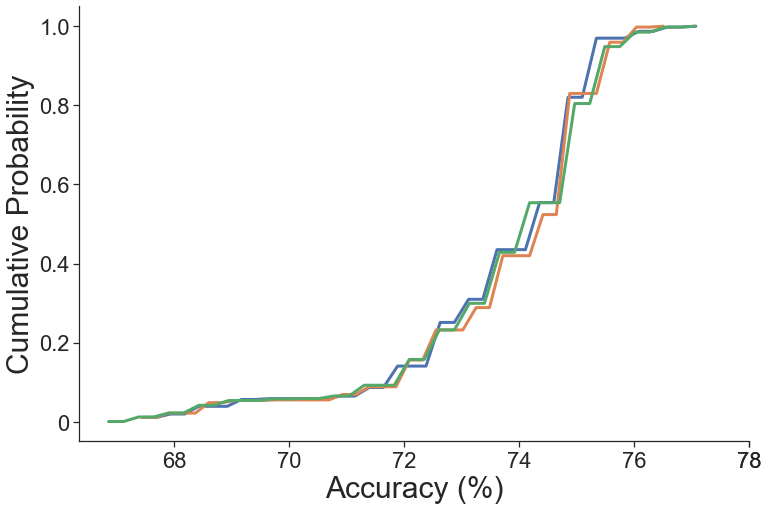

In [8]:
# Fig 2B
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 3})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
plt.plot(base1[:-1], cumulative1, label = 'PCE')
plt.plot(base2[:-1], cumulative2, label = 'MC')
plt.plot(base3[:-1], cumulative3, label = 'MCMC')

#plt.legend(loc = 'upper left', fontsize=20, frameon=False)
plt.xticks(np.array([0.68, 0.78, 0.70, 0.72, 0.74, 0.76, 0.78]), ( '68', '78', '70', '72', '74', '76', '78'))
plt.yticks(np.array([0, 0.2, 0.4, 0.6, 0.8, 1]), ('0', '0.2', '0.4', '0.6', '0.8', '1.0'))
plt.xlabel('Accuracy (%)', fontproperties=chf, fontsize=30)
plt.ylabel('Cumulative Probability', fontproperties=chf, fontsize=30)
sns.despine()
#plt.savefig('Fig2B.pdf', dpi = 600)
plt.show()

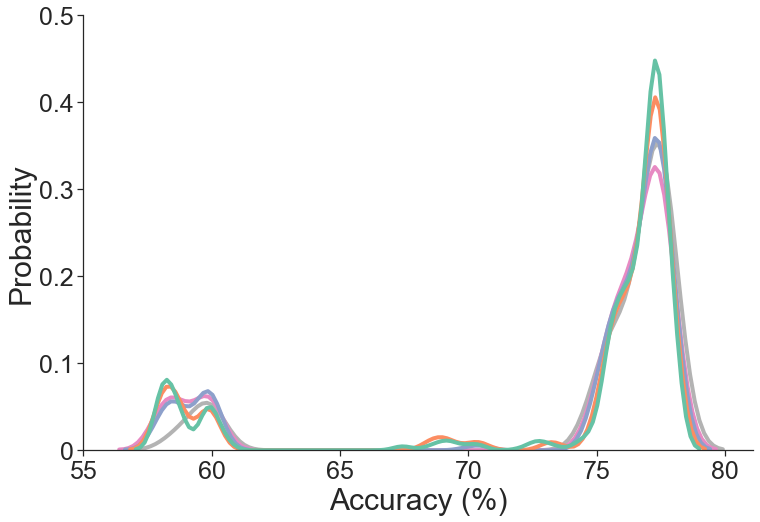

In [9]:
# Fig 2C
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 4})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
for i in range(len(input_mc_range)):
    sns.distplot(inputs[(inputs['Method'] == 'MC') & (inputs['SampleSize_Order'] == input_mc_range[i])]['Accuracy'].tolist(), 
                 #label=r'$N_{MC} =$' + str(i),
                 hist=False,
                 norm_hist=True,
                 color = colorset[i], 
                 bins = np.arange(0.55,0.8,0.01)
                )
plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.55, 0.6, 0.65, 0.7, 0.75, 0.8]), 
           ('55', '60', '65', '70', '75', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0,10,20,30,40,50]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'), 
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties=chf, fontsize=30)
plt.ylabel('Probability', fontproperties=chf, fontsize=30)
sns.despine()
#plt.savefig('Fig2C.pdf', dpi = 600)
plt.show()

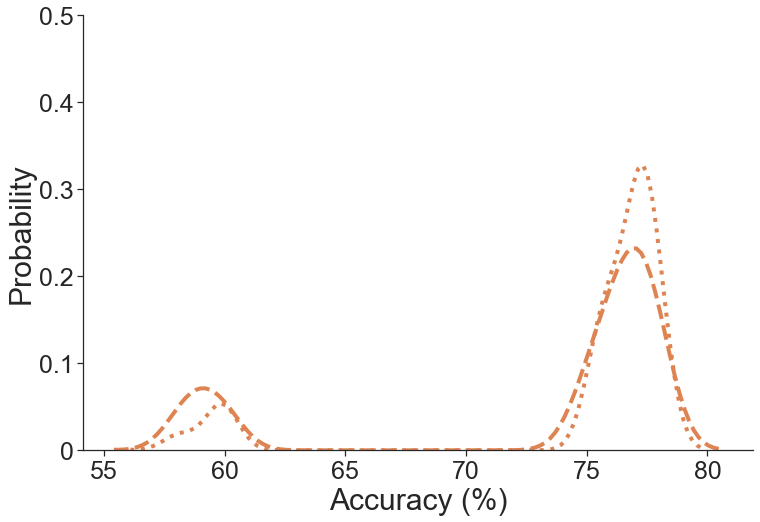

In [10]:
# Fig 2D
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 4})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
sns.distplot(input_uniform['Accuracy'].tolist(), 
             #label='Uniform',
             hist=False,
             norm_hist=True,
             kde_kws={'linestyle' : '--'}, 
             color = current_palette[1], 
             bins = np.arange(0.55,0.8,0.01)
)
sns.distplot(input_normal['Accuracy'].tolist(), 
             #label='Normal',
             hist=False,
             norm_hist=True,
             kde_kws={'linestyle' : 'dotted'}, 
             color = current_palette[1], 
             bins = np.arange(0.55,0.8,0.01)
)
#plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.55, 0.6, 0.65, 0.7, 0.75, 0.8]), 
           ('55', '60', '65', '70', '75', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0,10,20,30,40,50]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'), 
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties=chf, fontsize=30)
plt.ylabel('Probability', fontproperties=chf, fontsize=30)
sns.despine()
#plt.savefig('Fig2D.pdf', dpi = 600)
plt.show()

## Figure 3 Panel

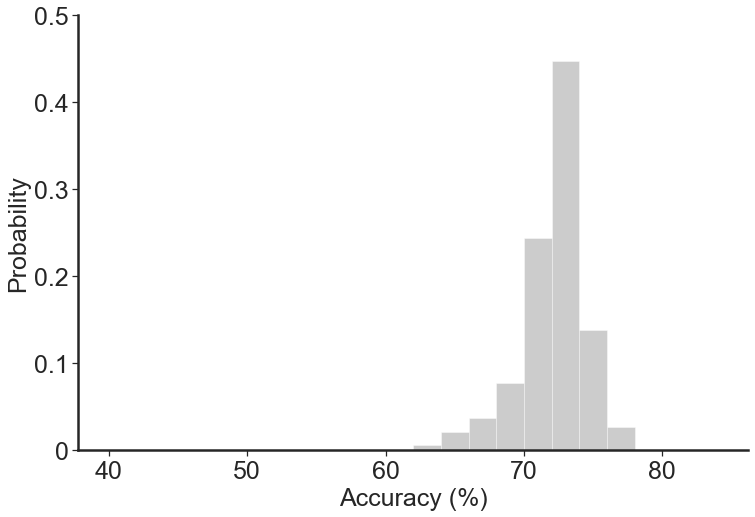

In [11]:
# Fig 3A
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
ax = sns.distplot(hill_para['Accuracy'].tolist(), 
             kde=False,
             norm_hist=True,
             bins = np.arange(0.4,0.85,0.02),
             color = 'grey'
            )
plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8]), 
           ('40', '50', '60', '70', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0, 5, 10, 15, 20, 25]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'), 
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
sns.despine()
#plt.savefig('Fig3A.pdf', dpi = 600)
plt.show()

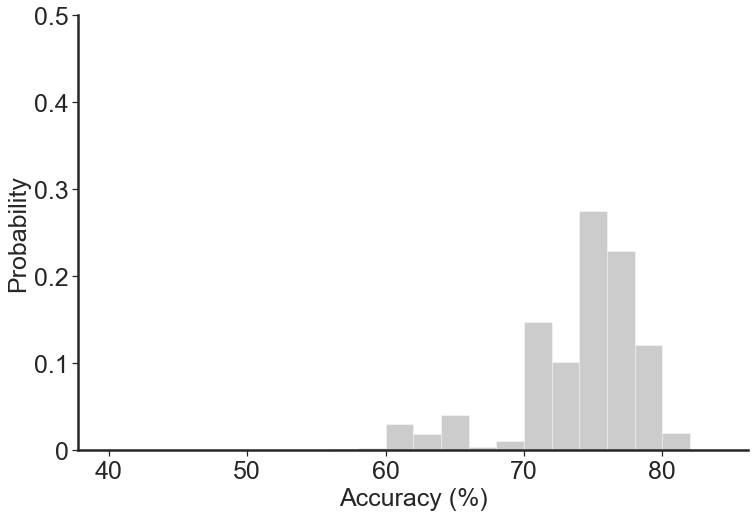

In [12]:
# Fig 3B
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
ax = sns.distplot(ec_para['Accuracy'].tolist(),  
             kde=False,
             norm_hist=True,
             bins = np.arange(0.4,0.85,0.02),
             color = 'grey'
            )
plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8]), 
           ('40', '50', '60', '70', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0, 5, 10, 15, 20, 25]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'), 
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
sns.despine()
#plt.savefig('Fig3B.pdf', dpi = 600)
plt.show()

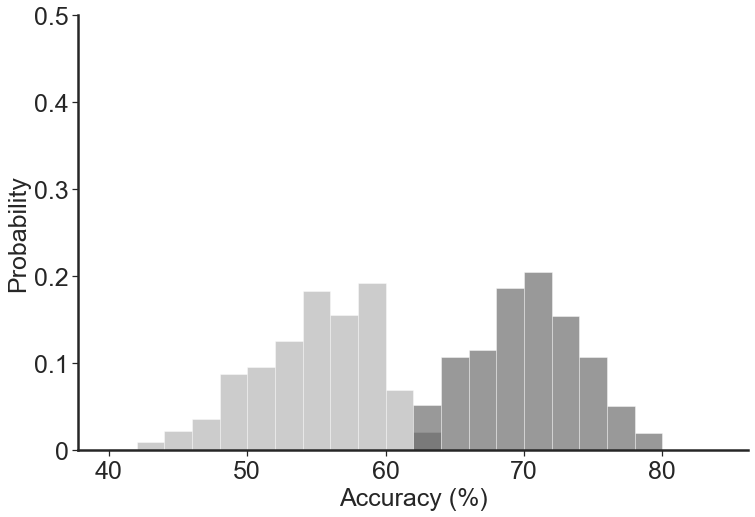

In [13]:
# Fig 3C
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
ax = sns.distplot(acc_weights[acc_weights['SampleSize'] == 10021]['Accuracy'].tolist(), 
             kde=False,
             norm_hist=True,
             bins = np.arange(0.4,0.85,0.02),
             color = 'grey'
            )
ax = sns.distplot(acc_weight_08[acc_weight_08['Sample'] == 13700]['Accuracy'].tolist(), 
             kde=False,
             norm_hist=True,
             bins = np.arange(0.4,0.85,0.02),
             color = 'black'
            )
plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8]), 
           ('40', '50', '60', '70', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0, 5, 10, 15, 20, 25]), 
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'), 
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
sns.despine()
#plt.savefig('Fig3C.pdf', dpi = 600)
plt.show()

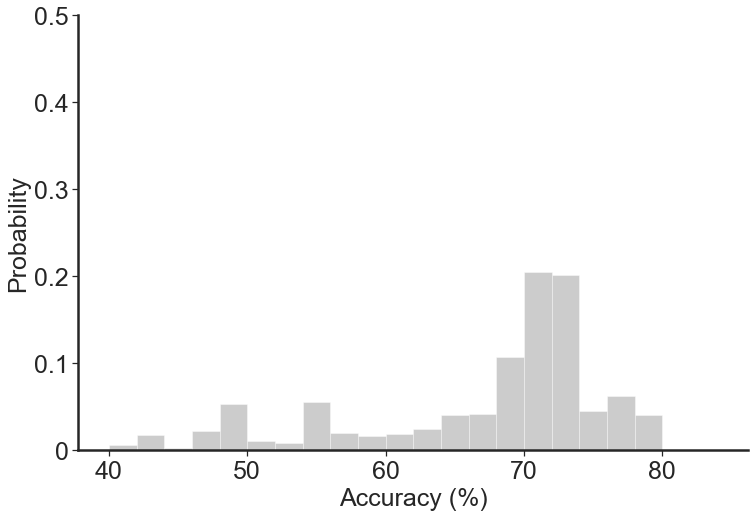

In [14]:
# Fig 3D
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
ax = sns.distplot(glob['Accuracy'],
             norm_hist=True,
             bins = np.arange(0.4,0.85,0.02),
             color = 'grey',
             kde=False
            )
plt.xticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8]),
           ('40', '50', '60', '70', '80'),
           fontproperties = chf_v4)
plt.yticks(np.array([0, 5, 10, 15, 20, 25]),
           ('0', '0.1', '0.2', '0.3', '0.4', '0.5'),
           fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
sns.despine()
#plt.savefig('Fig3D.pdf', dpi=300)
plt.show()

# Figure 4 Panel

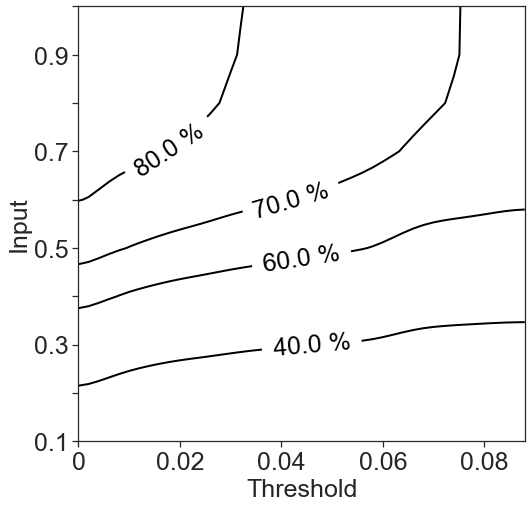

In [15]:
# Fig 4B
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (8,8))
ax = plt.contour(inpu_thre_smooth, 
                 colors='black',
                 linewidths=2,
                 levels = [0.4, 0.6, 0.7, 0.8]
                  #levels = [0.2, 0.5, 0.8],
                  #colors = ['#808080', '#A0A0A0', '#C0C0C0'],
                  #extend = 'both'
                 )
ax.levels = [np.round(val*100,1) for val in ax.levels]

# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r \%%'
else:
    fmt = '%r %%'

plt.clabel(ax, ax.levels, inline=True, fmt=fmt, fontsize=25)
plt.xticks(np.array([0, 10, 20, 30, 40]), 
           ('0', '0.02', '0.04', '0.06', '0.08'), 
           fontproperties=chf_v4)
plt.yticks(list(range(10)), 
           ('0.1', '', '0.3', '', '0.5', '', '0.7', '', '0.9', ''), 
           fontproperties=chf_v4)
plt.ylabel('Input', fontproperties=chf_v5)
plt.xlabel('Threshold', fontproperties=chf_v5)
#plt.savefig('Fig4B.pdf', dpi = 600)
plt.show()

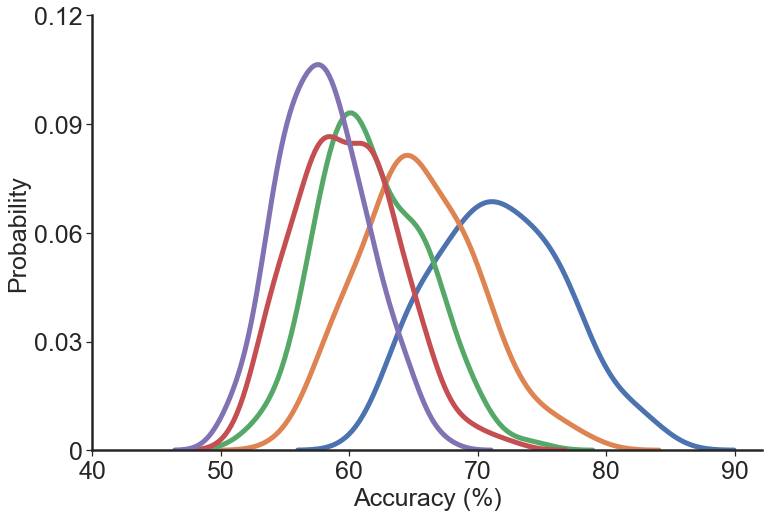

In [16]:
# Fig 4C
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
for i in thre_topo:
    if i%2 == 1:
        ax = sns.distplot(acc_topology[acc_topology['threshold'] == i]['Accuracy'].tolist(), 
                     #kde=False,
                     norm_hist=True,
                     hist=False,
                     bins = np.arange(0.4,0.9,0.01),
                     #label = r'$\theta = $'+str(i/100)
        )
#plt.legend(loc = 'best', fontsize=20, frameon=False)
plt.xticks(np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 
           ('40', '50', '60', '70', '80', '90'), 
          fontproperties = chf_v4)
plt.yticks(np.array([0, 3, 6, 9, 12]), 
           ('0', '0.03', '0.06', '0.09', '0.12'), 
          fontproperties = chf_v4)
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
sns.despine()
#plt.savefig('Fig4C.pdf', dpi = 600)
plt.show()

# Figure 5 Panel

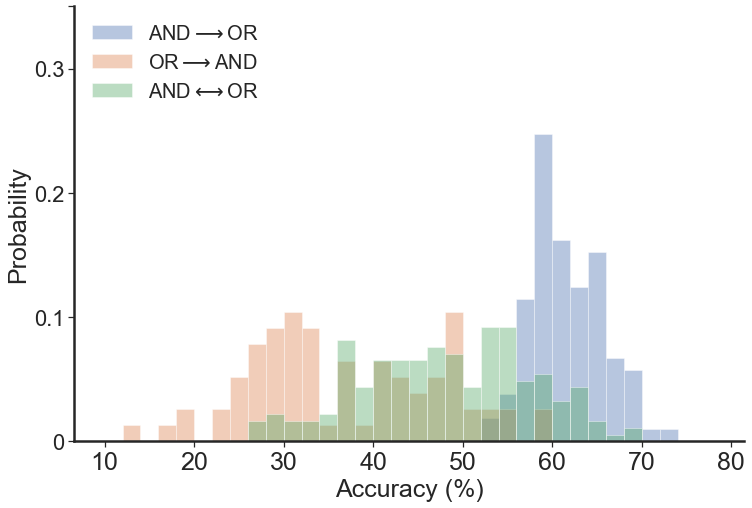

In [17]:
# Fig 5A
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
ax = sns.distplot(acc_topology[acc_topology['threshold'] == 5]['Accuracy'].tolist(), 
             label='AND'+r'$\longrightarrow$'+'OR',
             #hist=False,
             norm_hist=True,
             kde = False,
             bins = np.arange(0.1,0.8,0.02),
)
ax = sns.distplot(acc_or[acc_or['Threshold'] == 5]['Accuracy'].tolist(), 
             label='OR'+r'$\longrightarrow$'+'AND',
             #hist=False,
             norm_hist=True,
             kde = False,
             bins = np.arange(0.1,0.8,0.02),
)
ax = sns.distplot(final_check[final_check['Threshold'] == 5]['Accuracy'].tolist(), 
             label='AND'+r'$\longleftrightarrow$'+'OR',
             #hist=False,
             norm_hist=True,
             kde = False,
             bins = np.arange(0.1,0.8,0.02),
)
plt.legend(loc = 'upper left', fontsize=20, frameon=False)
plt.xticks(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]), 
           ('10', '20', '30', '40', '50', '60', '70', '80'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0,5,10,15,17.5]), ('0', '0.1', '0.2', '0.3', ''))
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
sns.despine()
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
#plt.savefig('Fig5A.pdf', dpi = 600)
plt.show()

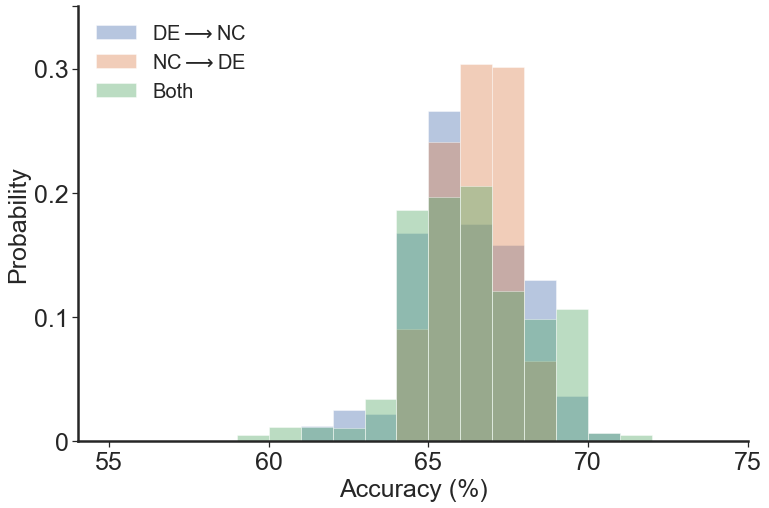

In [18]:
# Fig 5B
sns.set(font_scale=2)
sns.set_context(rc={"lines.linewidth": 5})
sns.set_style("ticks", {'axes.grid' : False, 'font.sans-serif':'Arial'})
plt.figure(figsize = (12,8))
ax = sns.distplot(val_alpha['Accuracy'].tolist(),  
             kde=False,
             norm_hist=True,
             bins = np.arange(0.55,0.75,0.01),
             label = 'DE'+r'$\longrightarrow$'+'NC'
            )
ax = sns.distplot(val_beta['Accuracy'].tolist(),  
             kde=False,
             norm_hist=True,
             bins = np.arange(0.55,0.75,0.01),
             label = 'NC'+r'$\longrightarrow$'+'DE'
            )
ax = sns.distplot(power_val_06_uc['Accuracy'].tolist(),  
             kde=False,
             norm_hist=True,
             bins = np.arange(0.55,0.75,0.01),
             label = 'Both'
            )
plt.xticks(np.array([0.55, 0.60, 0.65, 0.70, 0.75]), 
           ('55', '60', '65', '70', '75'), 
           fontproperties = chf_v4)
plt.yticks(np.array([0, 10, 20, 30, 35]), 
           ('0', '0.1', '0.2', '0.3', ''), 
           fontproperties = chf_v4)
plt.legend(loc = 'upper left', fontsize=20, frameon=False)
plt.xlabel('Accuracy (%)', fontproperties = chf_v5)
plt.ylabel('Probability', fontproperties = chf_v5)
sns.despine()
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['left'].set_linewidth(2.5)
#plt.savefig('Fig5B.pdf', dpi = 600)
plt.show()